In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [112]:
rfm = pd.read_csv('rfm.csv')

## из исходных данных создадим таблицу с такими столбцами:
+ карта лояльности
+ количество покупок - количество различных товаров, купленных клиентом
+ количество чеков - количество посещений магазина клиентом
+ сумма покупок - количество потраченных денег клиентом за весь период
+ время посещения(дней) - разница между последним и первым посещением в днях
+ количество дней с последнего визита - за дату отсчета возьмем, от которой считаем количество дней, возьмем `2019-01-02`

In [113]:
rfm.describe()

,количество покупок,количество чеков,сумма покупок,время посещения(дней),средний чек,количество дней с последнего визита
count,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000
mean,15.910922,3.099451,4678.493949,60.745997,1642.049742,58.182891
std,28.985305,5.684108,10332.308314,106.085724,2551.205999,75.345384
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,1.000000,715.500000,0.000000,480.000000,13.000000
50%,7.000000,1.000000,1775.000000,0.000000,995.666667,36.000000
75%,16.000000,3.000000,4641.000000,61.000000,1969.916667,67.000000
max,881.000000,191.000000,417740.000000,337.000000,121860.000000,357.000000


In [114]:
rfm

,карта,самая ранняя покупка,самая поздняя покупка,количество покупок,количество чеков,сумма покупок,время посещения(дней),средний чек,количество дней с последнего визита
0,23489164220602890,2018-01-10 10:05:20,2018-01-10 10:05:20,6.0,1.0,664.0,0,664.000000,357
1,23489856436419890,2018-01-10 10:11:02,2018-12-11 14:33:13,92.0,11.0,31752.0,335,2886.545455,21
2,2342880100497140890,2018-01-10 10:13:22,2018-12-11 17:22:11,196.0,24.0,40591.0,335,1691.291667,21
3,2342880100511600890,2018-01-10 10:37:31,2018-12-13 10:45:27,53.0,26.0,6823.0,337,262.423077,19
4,2342880100515141890,2018-01-10 11:48:41,2018-12-11 11:39:11,62.0,20.0,8341.0,334,417.050000,21
...,...,...,...,...,...,...,...,...,...
13298,2349038277601890.0,2018-12-31 08:47:19,2018-12-31 08:53:28,7.0,2.0,167.0,0,83.500000,2
13299,2.342880100531784e+18,2018-12-31 09:44:10,2018-12-31 09:44:10,2.0,1.0,364.0,0,364.000000,2
13300,2.348915970395089e+16,2018-12-31 12:39:40,2018-12-31 12:39:40,1.0,1.0,494.0,0,494.000000,1
13301,2.342880100544104e+18,2018-12-31 14:30:24,2018-12-31 14:30:24,6.0,1.0,1333.0,0,1333.000000,1


## разделим на категории по показателям 
+ **средний чек** 
+ **количество чеков**
+ **количество дней с последнего визита**

'средний чек' разделим на 4 категории:
+ средний чек меньше 500 рублей
+ средний чек от 500 до 2000 рублей
+ средний чек от 2000 до 6000 рублей
+ средний чек более 6000 рублей

**!!!на гистограмме ниже только первые три категории**

количество клиентов с средним чеком менее 500 рублей:  3499
количество клиентов с средним чеком от 500 до 2000 рублей:  6542
количество клиентов с средним чеком от 2000 до 6000 рублей:  2807
количество клиентов с средним чеком более 6000 рублей:  454


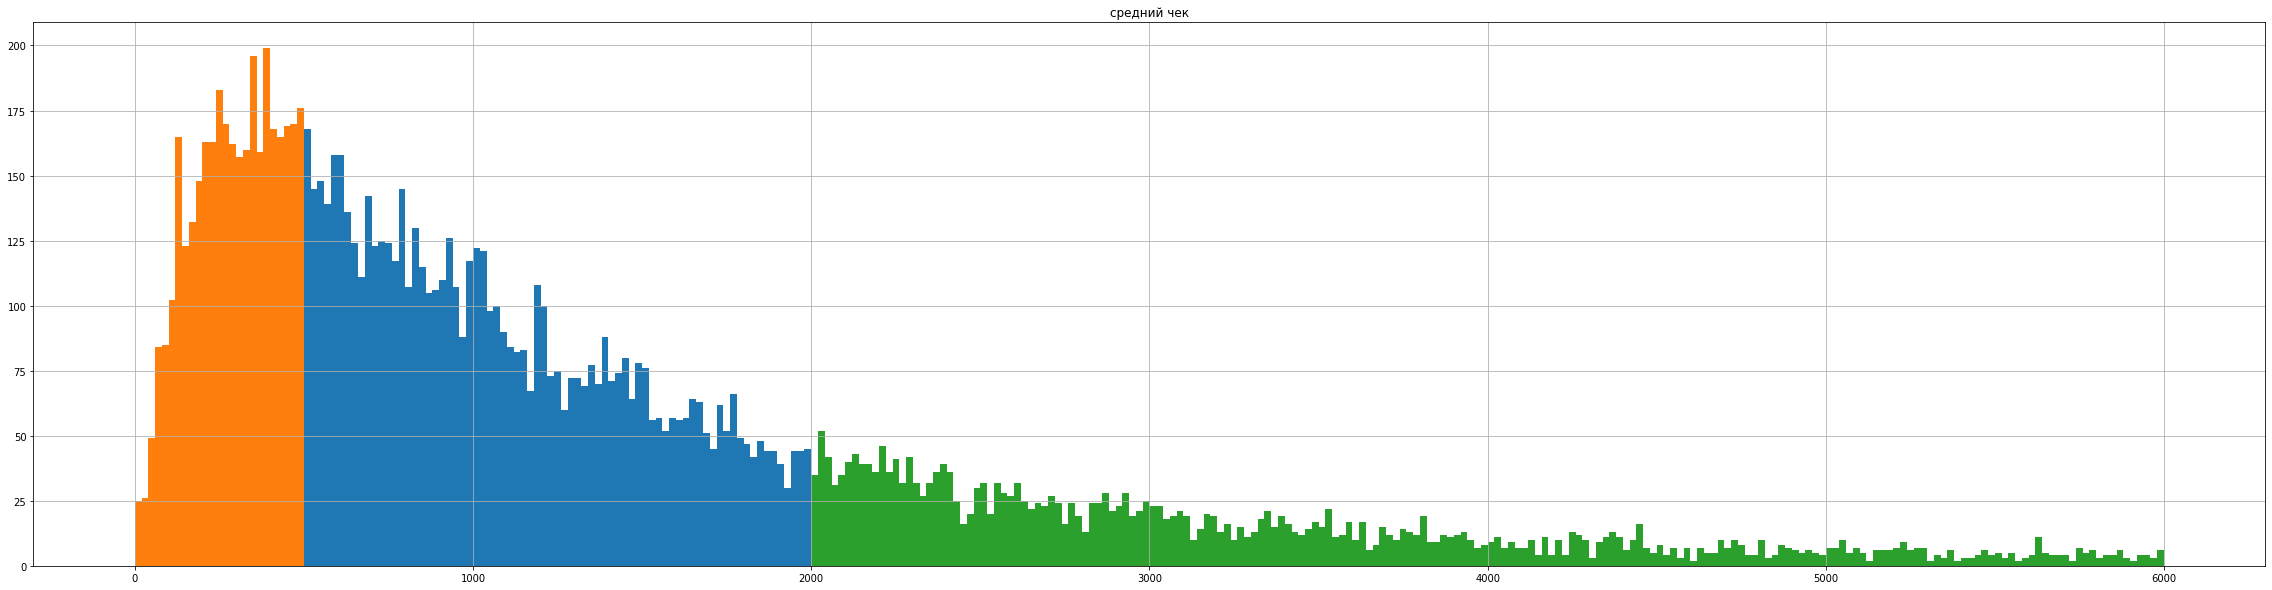

In [115]:
print('количество клиентов с средним чеком менее 500 рублей: ', len(rfm[rfm['средний чек'] < 500]))
print('количество клиентов с средним чеком от 500 до 2000 рублей: ', len(rfm[(rfm['средний чек'] >= 500) & (rfm['средний чек'] <= 2000)]))
print('количество клиентов с средним чеком от 2000 до 6000 рублей: ', len(rfm[(rfm['средний чек'] > 2000) & (rfm['средний чек'] < 6000)]))
print('количество клиентов с средним чеком более 6000 рублей: ', len(rfm[rfm['средний чек'] > 6000]))
plt.figure(figsize=(40,10))
plt.title('средний чек')
rfm[(rfm['средний чек'] >= 500) & (rfm['средний чек'] <= 2000)]['средний чек'].hist(bins=75);
rfm[rfm['средний чек'] < 500]['средний чек'].hist(bins=25);
rfm[(rfm['средний чек'] > 2000) & (rfm['средний чек'] < 6000)]['средний чек'].hist(bins=200);

'количество чеков' разделим на 3 категории:
+ 1 чек
+ от 2 до 11 чеков
+ более 11

**!!!на гистограмме ниже только первые две категории**

количество клиентов с 1 чеком:  6986
количество клиентов от 2 до 11 чеков:  5749
количество клиентов более 11 чеков:  568


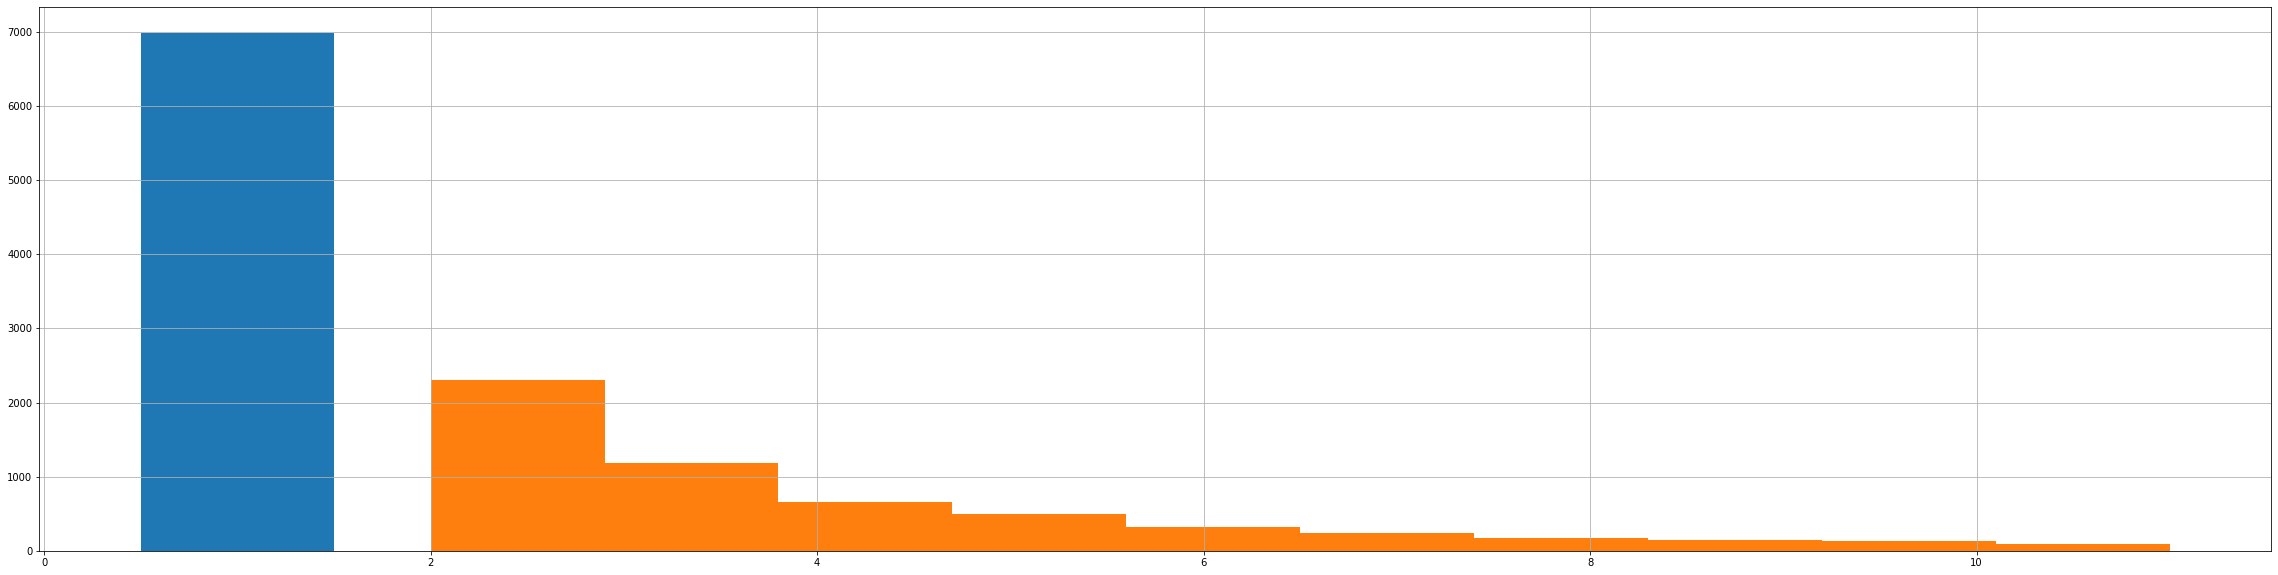

In [116]:
print('количество клиентов с 1 чеком: ', len(rfm[rfm['количество чеков'] == 1]))
print('количество клиентов от 2 до 11 чеков: ', len(rfm[(rfm['количество чеков'] >= 2) & (rfm['количество чеков'] <= 11)]))
print('количество клиентов более 11 чеков: ', len(rfm[rfm['количество чеков'] >= 12]))
plt.figure(figsize=(40,10))
rfm[rfm['количество чеков'] == 1]['количество чеков'].hist(bins=1);
rfm[(rfm['количество чеков'] >= 2) & (rfm['количество чеков'] <= 11)]['количество чеков'].hist(bins=10);
#rfm[rfm['количество чеков'] >= 12]['количество чеков'].hist(bins=10);

'количество дней с последнего визита' разделим на 3 категории:
+ с последнего визита прошло менее 7 дней
+ прошло от 7 до 30 дней
+ прошло более 30 дней

**!!!на гистограмме ниже только первые две категории**

с последнего визита прошло менее 7 дней:  2022
прошло от 7 до 30 дней:  3500
прошло более 30 дней:  7781


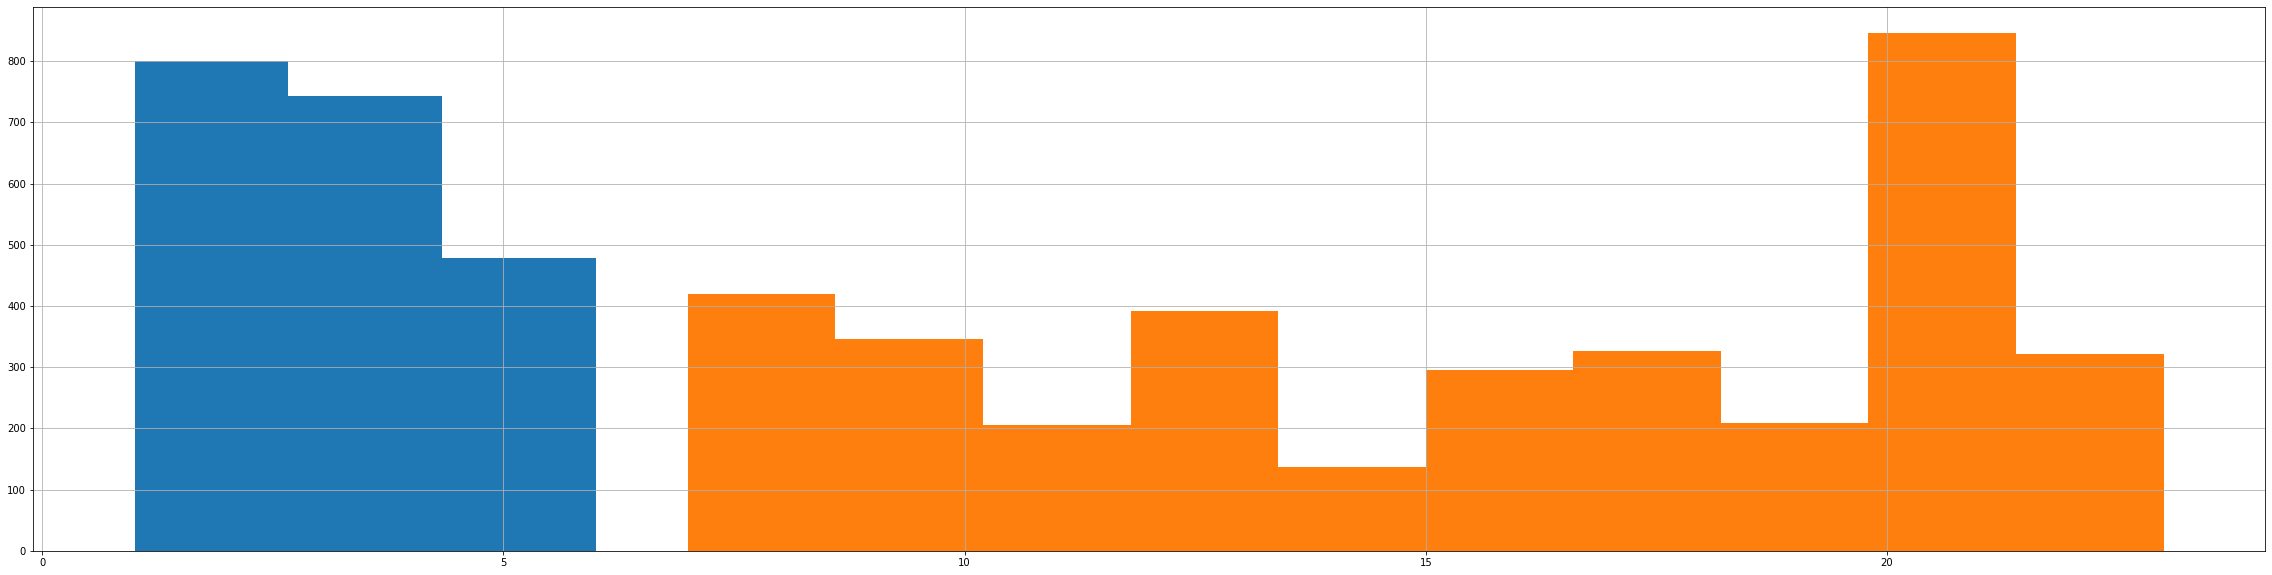

In [117]:
print('с последнего визита прошло менее 7 дней: ', len(rfm[rfm['количество дней с последнего визита'] < 7]))
print('прошло от 7 до 30 дней: ', len(rfm[(rfm['количество дней с последнего визита'] >= 7) & (rfm['количество дней с последнего визита'] <= 30)]))
print('прошло более 30 дней: ', len(rfm[rfm['количество дней с последнего визита'] > 30]))
plt.figure(figsize=(40,10))
rfm[rfm['количество дней с последнего визита'] < 7]['количество дней с последнего визита'].hist(bins=3);
rfm[(rfm['количество дней с последнего визита'] >= 7) & (rfm['количество дней с последнего визита'] <= 30)]['количество дней с последнего визита'].hist(bins=10);


In [118]:
rfm[(rfm['количество дней с последнего визита'] < 7) & (rfm['средний чек'] > 6000) & (rfm['количество чеков'] >= 12)]

,карта,самая ранняя покупка,самая поздняя покупка,количество покупок,количество чеков,сумма покупок,время посещения(дней),средний чек,количество дней с последнего визита


Клиентов можно разделить на 36 категорий (все сочетания признаков выше) вычеркнуты самые нелояльные клиенты и жирным отмечены самые лояльные категории:

+ средний чек меньше 500 рублей + 1 чек + с последнего визита прошло менее 7 дней - 199 клиентов
+ средний чек меньше 500 рублей + 1 чек + прошло от 7 до 30 дней - 584 клиентов
+ ~~средний чек меньше 500 рублей + 1 чек + прошло более 30 дней~~ - 1357 клиентов

+ средний чек меньше 500 рублей + от 2 до 11 чеков + с последнего визита прошло менее 7 дней
+ средний чек меньше 500 рублей + от 2 до 11 чеков + прошло от 7 до 30 дней
+ средний чек меньше 500 рублей + от 2 до 11 чеков + прошло более 30 дней

+ средний чек меньше 500 рублей + более 11 + с последнего визита прошло менее 7 дней
+ средний чек меньше 500 рублей + более 11 + прошло от 7 до 30 дней
+ средний чек меньше 500 рублей + более 11 + прошло более 30 дней


-------

+ средний чек от 500 до 2000 рублей + 1 чек + с последнего визита прошло менее 7 дней
+ средний чек от 500 до 2000 рублей + 1 чек + прошло от 7 до 30 дней 
+ ~~средний чек от 500 до 2000 рублей + 1 чек + прошло более 30 дней~~

+ средний чек от 500 до 2000 рублей + от 2 до 11 чеков + с последнего визита прошло менее 7 дней
+ средний чек от 500 до 2000 рублей + от 2 до 11 чеков + прошло от 7 до 30 дней
+ средний чек от 500 до 2000 рублей + от 2 до 11 чеков + прошло более 30 дней

+ **средний чек от 500 до 2000 рублей + более 11 + с последнего визита прошло менее 7 дней** - 23 клиента
+ **средний чек от 500 до 2000 рублей + более 11 + прошло от 7 до 30 дней** - 197 клиентов
+ средний чек от 500 до 2000 рублей + более 11 + прошло более 30 дней


---------


+ средний чек от 2000 до 6000 рублей + 1 чек + с последнего визита прошло менее 7 дней
+ средний чек от 2000 до 6000 рублей + 1 чек + прошло от 7 до 30 дней 
+ ~~средний чек от 2000 до 6000 рублей + 1 чек + прошло более 30 дней~~

+ средний чек от 2000 до 6000 рублей + от 2 до 11 чеков + с последнего визита прошло менее 7 дней
+ средний чек от 2000 до 6000 рублей + от 2 до 11 чеков + прошло от 7 до 30 дней
+ средний чек от 2000 до 6000 рублей + от 2 до 11 чеков + прошло более 30 дней

+ **средний чек от 2000 до 6000 рублей + более 11 + с последнего визита прошло менее 7 дней** - 5 клиентов
+ **средний чек от 2000 до 6000 рублей + более 11 + прошло от 7 до 30 дней** - 65 клиентов
+ средний чек от 2000 до 6000 рублей + более 11 + прошло более 30 дней


----------

+ средний чек более 6000 рублей + 1 чек + с последнего визита прошло менее 7 дней
+ средний чек более 6000 рублей + 1 чек + прошло от 7 до 30 дней 
+ ~~средний чек более 6000 рублей + 1 чек + прошло более 30 дней~~

+ средний чек более 6000 рублей + от 2 до 11 чеков + с последнего визита прошло менее 7 дней
+ средний чек более 6000 рублей + от 2 до 11 чеков + прошло от 7 до 30 дней
+ средний чек более 6000 рублей + от 2 до 11 чеков + прошло более 30 дней

+ **средний чек более 6000 рублей + более 11 + с последнего визита прошло менее 7 дней** - 0 клиентов
+ **средний чек более 6000 рублей + более 11 + прошло от 7 до 30 дней** - 4 клиента
+ средний чек более 6000 рублей + более 11 + прошло более 30 дней







# что можно сделать с полученными данными:

+ можно у самых лояльных клиентов проанализировать покупки и предложить им новые аналоги товаров, которые они покупают (например в мобильном приложении)
+ партнерская программа для самых лояльных клиентов - если они привлекут своих знакомых и друзей в эту сеть, то для них какие-то бонусы (можно и для привлеченных знакомых бонусы)
+ для средних клиентов можно предложить бонусы на покупки, если клиент совершит покупку в течение например 7 дней и на определенную сумму
+ вообще чтобы повысить средний чек клиента, можно предложить какие-то бонусы, которые начинают действовать с определенной суммы покупки
+ а чтобы привлечь клиента, который давно не был, можно в приложении предложить бонусы, которые действуют только определенное время
+ можно посмотреть, сколько денег принесла каждая категория клиентов

## еще можно использовать другой подход в анализе

### Анализировать не клиентов, а проданные товары (например при анализе клиентов никак не анализируются покупки, которые совершены без карт лояльности)

### здесь можно сделать следующее:

+ анализировать проданные товары и предсказывать на них спрос (нужно больше данных для анализа)
+ предсказывать спрос на скоропортящиеся продукты и тем самым уменьшить отходы, закупая только нужное количество
+ на категории товаров, которые берут больше всего, увеличивать ассортимент с помощью более дорогих и более качественных аналогов
 + например для условных обычных макарон добавить аналог подороже, но в начале продавать его по акции (по цене обычных макарон), а потом повышать цены
+ анализировать сочетания товаров, которые часто берутся (далее для тех, кто берет из этого сочетания одно, предлагать другое из сочетания)